In [304]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from pcigale.sed import SED
from pcigale.sed import utils
from pcigale.sed_modules import get_module

import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 

In [305]:
def generate_model(AGE, EBmV, TAU=1e-10):
    
    # Initialisation of a new galaxy / SED
    galaxy = SED()
    
    # Get the CIGALE SED generation module, i.e. SFH module, SPS module and DUST module
    sfh_module = get_module(
        'sfh2exp',
        tau_main = TAU,
        tau_burst = 1,
        burst_age = 1,
        age = AGE,
        f_burst = 0,
        normalise = True) # Normalise the SFH to produce one solar mass
    
    sps_module = get_module('bc03', imf = 1, metallicity = 0.02)

    dust_module = get_module('dustatt_calzleit', E_BVs_young = EBmV/0.44, E_BVs_old_factor = 0.44)

    # We process the SED object with all the modules in the right order
    sfh_module.process(galaxy)
    sps_module.process(galaxy)
    dust_module.process(galaxy)
    modwave = galaxy.wavelength_grid*10 # Convert nm to A
    
    # This is the LUMINOSITY density from the stellar components in W/nm
    stellar_lum = galaxy.luminosities['stellar.young']+galaxy.luminosities['stellar.old']
    # This is the FLUX density from the stellar components in W/(m2*nm) at 10 parsec, hero needs distance
    # Convert  in to cgs units erg(cm2*s*A). x1000 W/m2 to erg/(cm2*s) and x0.1 for nm to A = fact?
    stellar_flux = utils.luminosity_to_flux(stellar_lum, 10. * 3.0865E16)*100
    
    # Repeat for the attenuated SED
    stellar_lum_att = np.copy(stellar_lum)
    stellar_lum_att += galaxy.luminosities['attenuation.stellar.young']+galaxy.luminosities['attenuation.stellar.old']
    stellar_flux_att = utils.luminosity_to_flux(stellar_lum_att, 10. * 3.0865E16)*100
    
    return modwave, stellar_flux, stellar_flux_att

In [306]:
# Now read one of the SDSS spectra
hdu = fits.open('Spectra\SDSS_spec_G1.fits')
spflux = hdu[0].data*1e-17 
spwave = hdu[0].header['CRVAL1']+np.arange(hdu[0].header['NAXIS1'])*hdu[0].header['CDELT1'] 
redshift = hdu[0].header['REDSHIFT']

$$d = \dfrac{z \times c}{H_o}$$

In [307]:
conversion_factor = (1e-5)**2 / (redshift*3e10/70e5)**2

In [308]:
redshift*3e10/70e5

84.0

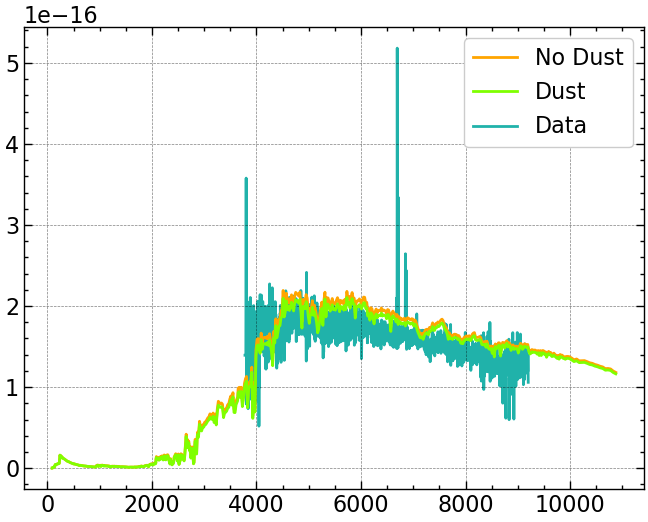

In [309]:
# Now read one of the SDSS spectra
hdu = fits.open('Spectra\SDSS_spec_G1.fits')
spflux = hdu[0].data*1e-17 
spwave = hdu[0].header['CRVAL1']+np.arange(hdu[0].header['NAXIS1'])*hdu[0].header['CDELT1'] 
redshift = hdu[0].header['REDSHIFT']

x_G1, y_G1, y_att_G1 = np.array(generate_model(AGE=int(2e3), EBmV=0.01))[:,:700]

mass = 5e8
y_G1 = y_G1 * conversion_factor * mass
y_att_G1 = y_att_G1 * conversion_factor * mass

plt.plot(x_G1, y_G1, color='orange', label='No Dust')
plt.plot(x_G1, y_att_G1, color='chartreuse', label='Dust')
plt.plot(spwave, spflux, color='lightseagreen', label='Data', zorder=0)
plt.legend()


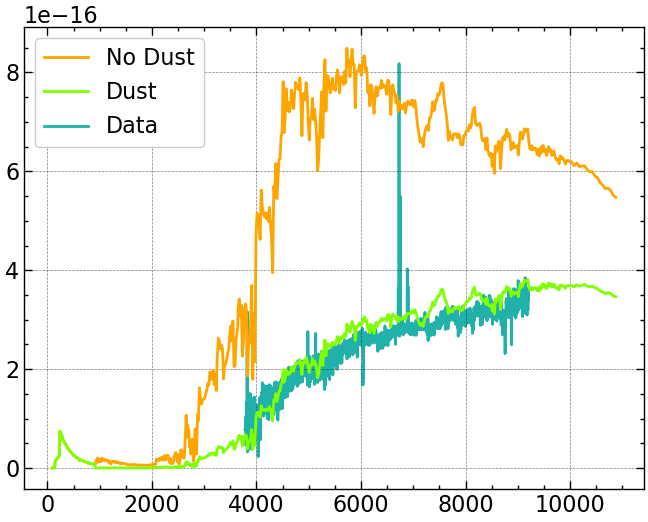

In [310]:
# Now read one of the SDSS spectra
hdu = fits.open('Spectra\SDSS_spec_G2.fits')
spflux = hdu[0].data*1e-17
spwave = hdu[0].header['CRVAL1']+np.arange(hdu[0].header['NAXIS1'])*hdu[0].header['CDELT1'] 
redshift = hdu[0].header['REDSHIFT']

x_G2, y_G2, y_att_G2 = np.array(generate_model(AGE=int(5e3), EBmV=0.3))[:,:700]

mass = 4.5e9
y_G2 = y_G2 * conversion_factor * mass
y_att_G2 = y_att_G2 * conversion_factor * mass

plt.plot(x_G2, y_G2, color='orange', label='No Dust')
plt.plot(x_G2, y_att_G2, color='chartreuse', label='Dust')
plt.plot(spwave, spflux, color='lightseagreen', label='Data', zorder=0)
plt.legend()

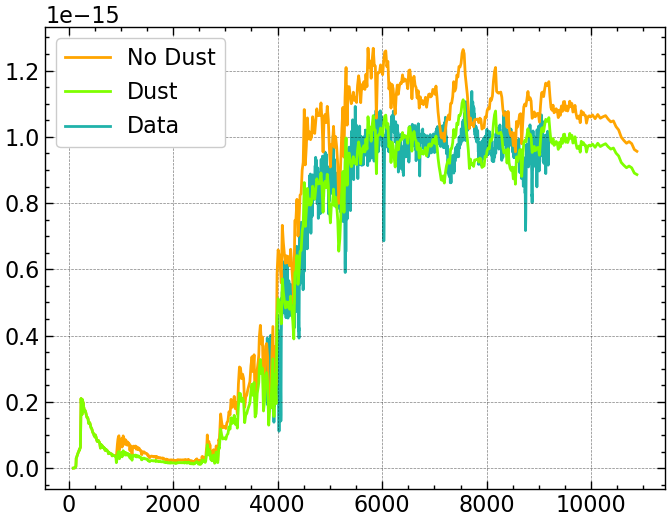

In [311]:
# Now read one of the SDSS spectra
hdu = fits.open('Spectra\SDSS_spec_G3.fits')
spflux = hdu[0].data*1e-17
spwave = hdu[0].header['CRVAL1']+np.arange(hdu[0].header['NAXIS1'])*hdu[0].header['CDELT1'] 
redshift = hdu[0].header['REDSHIFT']

x_G3, y_G3, y_att_G3 = np.array(generate_model(AGE=int(13e3), EBmV=0.05))[:,:700]

mass = 1.5e10
y_G3 = y_G3 * conversion_factor * mass
y_att_G3 = y_att_G3 * conversion_factor * mass

plt.plot(x_G3, y_G3, color='orange', label='No Dust')
plt.plot(x_G3, y_att_G3, color='chartreuse', label='Dust')
plt.plot(spwave, spflux, color='lightseagreen', label='Data', zorder=0)
plt.legend()